# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from newsapi import NewsApiClient
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/bashirshah/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bashirshah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [5]:
api_key = "231a98b7db5444ae8f09c1df4d727849"

In [6]:
# Read your api key environment variable
news_api_key = os.getenv('news_api_key')

In [7]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [8]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="Bitcoin", language="en")
bitcoin_headlines['totalResults']

7423

In [9]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="Ethereum", language="en")
ethereum_headlines['totalResults']

3405

In [10]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        title = article["title"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        
        
        bitcoin_sentiments.append({
           
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Bitcoin title": title,
             "text": text,
            
        })
        
    except AttributeError:
        pass
    

In [11]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Bitcoin title", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Bitcoin title,text
0,0.3612,0.000,0.923,0.077,Elon Musk reveals who bitcoin's creator Satosh...,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...
1,0.0000,0.000,1.000,0.000,"As Kazakhstan Descends into Chaos, Crypto Mine...",When Denis Rusinovich set up cryptocurrency mi...
2,0.3182,0.000,0.895,0.105,The International Monetary Fund tells El Salva...,El Salvador introduced Bitcoin as a legal tend...
3,-0.4404,0.083,0.917,0.000,Jack Dorsey’s Block is working to make Bitcoin...,Were officially building an open Bitcoin minin...
4,0.0000,0.000,1.000,0.000,Crypto.com admits over $30 million stolen by h...,"In a new blog post the company said that 4,836..."


In [12]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        title = article['title']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        
        
        ethereum_sentiments.append({
           
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Ethereum title": title,
             "text": text,
            
        })
        
    except AttributeError:
        pass

In [13]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!

In [14]:
# Create the ethereum sentiment scores DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Ethereum title", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,Compound,Negative,Neutral,Positive,Ethereum title,text
0,0.0000,0.000,1.000,0.000,Crypto.com admits over $30 million stolen by h...,"In a new blog post the company said that 4,836..."
1,0.0000,0.000,1.000,0.000,Hackers Launder $15 Million Stolen From Crypto...,Hackers who made off with roughly $15 million ...
2,0.1779,0.000,0.948,0.052,Eric Adams Is Taking His First Paycheck in Crypto,"On some level, the new mayor is simply employi..."
3,0.0772,0.000,0.962,0.038,Robinhood opens cryptocurrency wallet to beta ...,"Back in September\r\n, Robinhood announced pla..."
4,-0.1027,0.067,0.877,0.056,Crypto.com Finally Acknowledges $34 Million St...,Trading platform Crypto.com lost about $34 mil...


In [15]:
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.025825,0.033050,0.918250,0.048700
std,0.366588,0.041999,0.055389,0.055739
min,-0.440400,0.000000,0.787000,0.000000
25%,-0.374150,0.000000,0.907750,0.000000
50%,0.000000,0.000000,0.923000,0.045000
75%,0.328950,0.078500,0.942000,0.074000
max,0.680800,0.101000,1.000000,0.185000


In [16]:
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.164365,0.008700,0.938200,0.053050
std,0.272452,0.021502,0.066563,0.065873
min,-0.153100,0.000000,0.783000,0.000000
25%,0.000000,0.000000,0.894000,0.000000
50%,0.000000,0.000000,0.951000,0.039500
75%,0.406800,0.000000,1.000000,0.090250
max,0.757900,0.067000,1.000000,0.217000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [18]:
sw_addon = {'bar', 'char', 'every', 'has', 'have', 'had', 'colleague'}

In [19]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer() 
    lem = [lemmatizer.lemmatize(word) for word in words]
    #convert to lower and remove the stopwords 
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
            
    return tokens

In [20]:
bitcoin_tokens = bitcoin_df.copy()

In [21]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bashirshah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
tokenized = []
for i in bitcoin_tokens['text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens':tokenized_articles})

In [23]:
tokens_df= pd.DataFrame(tokenized)
bitcoin_tokens['tokens_text'] = tokens_df

In [24]:
tokenized = []
for i in bitcoin_tokens['Bitcoin title']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens title':tokenized_articles})

In [25]:
tokens_df= pd.DataFrame(tokenized)
bitcoin_tokens['tokens_title'] = tokens_df

In [26]:
bitcoin_tokens.head()

,Compound,Negative,Neutral,Positive,Bitcoin title,text,tokens_text,tokens_title
0,0.3612,0.000,0.923,0.077,Elon Musk reveals who bitcoin's creator Satosh...,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...,"[muskmark, ralstonafp, via, getty, imageselon,...","[elon, musk, reveals, bitcoins, creator, satos..."
1,0.0000,0.000,1.000,0.000,"As Kazakhstan Descends into Chaos, Crypto Mine...",When Denis Rusinovich set up cryptocurrency mi...,"[denis, rusinovich, set, cryptocurrency, minin...","[kazakhstan, descends, chaos, crypto, miners, ..."
2,0.3182,0.000,0.895,0.105,The International Monetary Fund tells El Salva...,El Salvador introduced Bitcoin as a legal tend...,"[el, salvador, introduced, bitcoin, legal, ten...","[international, monetary, fund, tell, el, salv..."
3,-0.4404,0.083,0.917,0.000,Jack Dorsey’s Block is working to make Bitcoin...,Were officially building an open Bitcoin minin...,"[officially, building, open, bitcoin, mining, ...","[jack, dorseys, block, working, make, bitcoin,..."
4,0.0000,0.000,1.000,0.000,Crypto.com admits over $30 million stolen by h...,"In a new blog post the company said that 4,836...","[new, blog, post, company, said, eth, bitcoin,...","[cryptocom, admits, million, stolen, hacker]"


In [27]:
ethereum_tokens = ethereum_df.copy()

In [28]:
tokenized_eth = []
for i in ethereum_tokens['text']:
    tokenized_articles = tokenizer(i)
    tokenized_eth.append({'tokens_text':tokenized_articles})

In [29]:
tokens_df_eth = pd.DataFrame(tokenized_eth)
ethereum_tokens['tokens_text'] = tokens_df_eth

In [30]:
tokenized_eth = []
for i in ethereum_tokens['Ethereum title']:
    tokenized_articles = tokenizer(i)
    tokenized_eth.append({'tokens_title':tokenized_articles})

In [31]:
tokens_df_eth = pd.DataFrame(tokenized_eth)
ethereum_tokens['tokens_title'] = tokens_df_eth

In [32]:
ethereum_tokens.head()

,Compound,Negative,Neutral,Positive,Ethereum title,text,tokens_text,tokens_title
0,0.0000,0.000,1.000,0.000,Crypto.com admits over $30 million stolen by h...,"In a new blog post the company said that 4,836...","[new, blog, post, company, said, eth, bitcoin,...","[cryptocom, admits, million, stolen, hacker]"
1,0.0000,0.000,1.000,0.000,Hackers Launder $15 Million Stolen From Crypto...,Hackers who made off with roughly $15 million ...,"[hackers, made, roughly, million, ethereum, cr...","[hackers, launder, million, stolen, cryptocom,..."
2,0.1779,0.000,0.948,0.052,Eric Adams Is Taking His First Paycheck in Crypto,"On some level, the new mayor is simply employi...","[level, new, mayor, simply, employing, ageold,...","[eric, adams, taking, first, paycheck, crypto]"
3,0.0772,0.000,0.962,0.038,Robinhood opens cryptocurrency wallet to beta ...,"Back in September\r\n, Robinhood announced pla...","[back, september, robinhood, announced, plan, ...","[robinhood, open, cryptocurrency, wallet, beta..."
4,-0.1027,0.067,0.877,0.056,Crypto.com Finally Acknowledges $34 Million St...,Trading platform Crypto.com lost about $34 mil...,"[trading, platform, cryptocom, lost, million, ...","[cryptocom, finally, acknowledges, million, st..."


In [33]:
#NGrams and Frequency Analysis
from collections import Counter
from nltk import ngrams

In [34]:
all_bitcoin_words = []
for text in bitcoin_tokens['tokens_text']:
    for word in text:
        all_bitcoin_words.append(word)

In [35]:
all_eth_words = []
for text in ethereum_tokens['tokens_text']:
    for word in text:
        all_eth_words.append(word)

In [36]:
bitcoin_sent = []
for sent in bitcoin_tokens['text']:
    sent_list = sent
    bitcoin_sent.append(sent_list)

In [37]:
eth_sent = []
for sent in ethereum_tokens['text']:
    sent_list_eth = sent
    eth_sent.append(sent_list_eth)

In [38]:
def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_15 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_15.items()), columns=['Bigram', 'Count'])

In [39]:
bigram_counter(bitcoin_sent)

,Bigram,Count
0,"(bitcoin, mining)",4
1,"(el, salvador)",3
2,"(building, open)",3
3,"(open, bitcoin)",3
4,"(mining, system)",3
5,"(blog, post)",3
6,"(alongside, us)",2
7,"(alex, castro)",2
8,"(international, monetary)",2
9,"(officially, building)",2


In [40]:
bigram_counter(eth_sent)

,Bigram,Count
0,"(blog, post)",3
1,"(new, blog)",2
2,"(post, company)",2
3,"(company, said)",2
4,"(according, new)",2
5,"(new, york)",2
6,"(york, city)",2
7,"(restaurant, clearwater)",2
8,"(clearwater, beach)",2
9,"(believers, open)",2


In [41]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    Counter_words = dict(Counter(tokens).most_common(N))
    return pd.DataFrame(list(Counter_words.items()), columns=['Word', 'Count'])

In [42]:
token_count(all_bitcoin_words)

,Word,Count
0,bitcoin,14
1,cryptocurrency,9
2,company,8
3,ha,8
4,mining,7
5,new,6
6,open,5
7,el,4
8,building,4
9,digital,3


In [43]:
token_count(all_eth_words)

,Word,Count
0,new,8
1,ethereum,8
2,bitcoin,6
3,cryptocurrency,6
4,company,5
5,digital,4
6,crypto,4
7,blockchains,4
8,blog,3
9,post,3


In [44]:
#WordClouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [45]:
def processed_text(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    return big_string

In [46]:
bitcoin_words = processed_text(all_bitcoin_words)
eth_words = processed_text(all_eth_words)

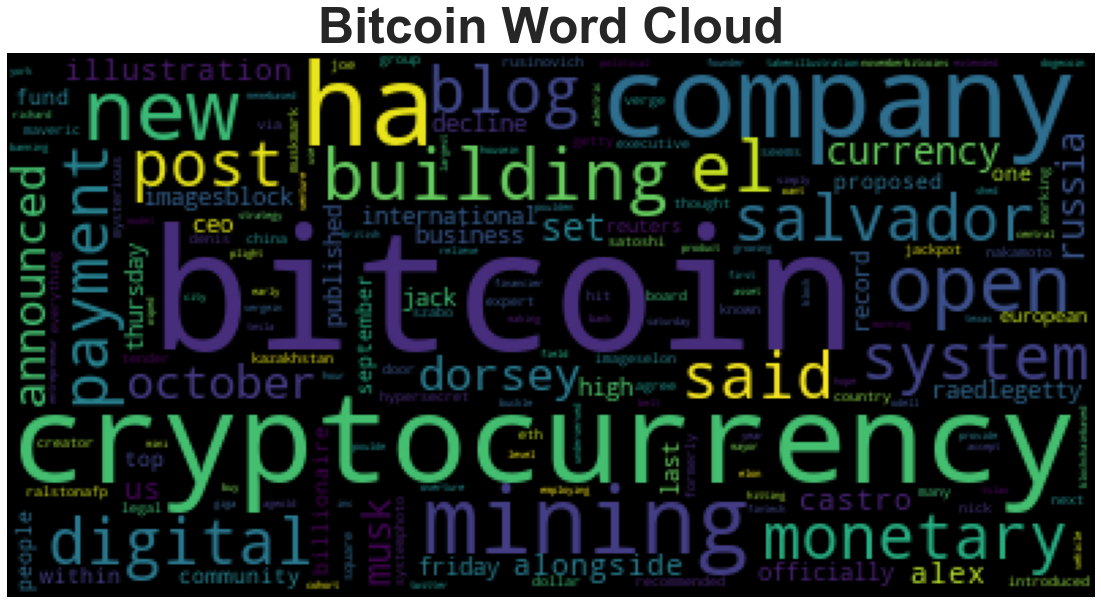

In [47]:
wc = WordCloud(collocations=False).generate(bitcoin_words)
fig = plt.figure()
plt.imshow(wc)
plt.title('Bitcoin Word Cloud', fontsize=50, fontweight='bold')
plt.axis('off')
plt.show()

In [48]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


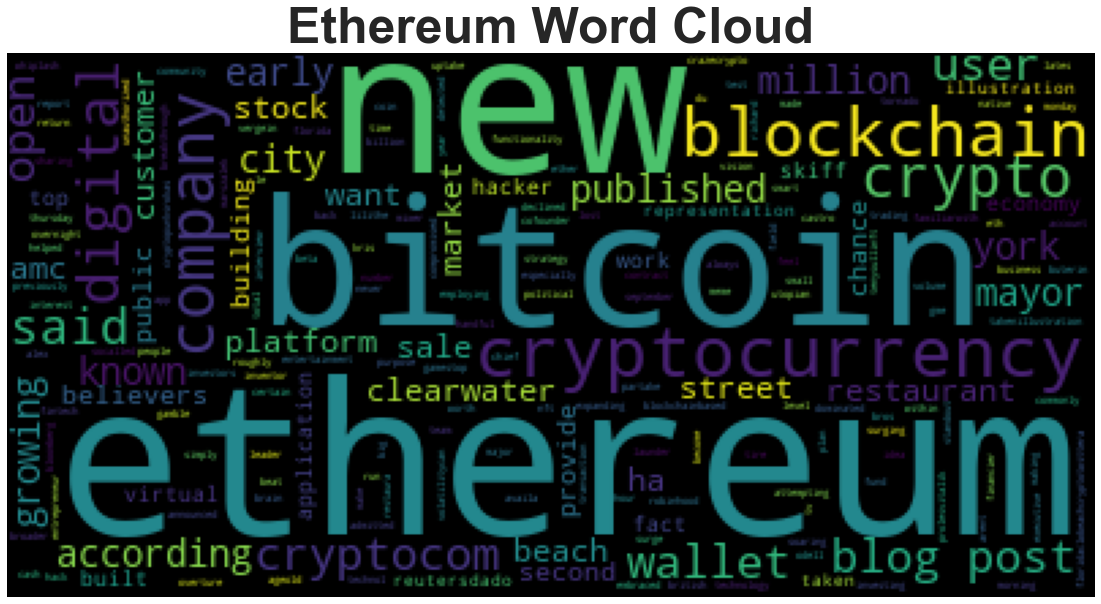

In [49]:
fig = plt.figure()
wc = WordCloud().generate(eth_words)
plt.imshow(wc)
plt.title('Ethereum Word Cloud', fontsize=50, fontweight='bold')
plt.axis('off')
plt.show()

In [50]:
#Named Entity Recognition
import spacy
from spacy import displacy

In [51]:
#BitcoinNER
bitcoin_sent = []
for sent in bitcoin_tokens['text']:
    sent_list = sent
    bitcoin_sent.append(sent_list)
    
big_string_bitcoin = ' '.join(bitcoin_sent)
big_string_bitcoin

'Musk.MARK RALSTON/AFP via Getty Images\r\nElon Musk seems to agree with many that hyper-secret cryptocurrency expert Nick Szabo could be Satoshi Nakamoto, the mysterious creator of the digital currency… [+1467 chars] When Denis Rusinovich set up cryptocurrency mining company Maveric Group in Kazakhstan in 2017, he thought he had hit the jackpot. Next door to China and Russia, the country had everything a Bitcoin … [+4140 chars] El Salvador introduced Bitcoin as a legal tender alongside the US dollar in 2021. | Illustration by Alex Castro / The Verge\r\n\n \n\n The International Monetary Fund’s executive board has recommended El … [+2691 chars] Were officially building an open Bitcoin mining system\r\nPhoto by Joe Raedle/Getty Images\r\nBlock, the payment company formerly known as Square, is working on building an open Bitcoin mining system, it… [+2078 chars] In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a

In [52]:
bitcoin_doc = nlp(big_string_bitcoin)
bitcoin_doc.user_data['title'] = 'Bitcoin NER'
displacy.render(bitcoin_doc, style='ent')

NameError: name 'nlp' is not defined

# Bitcoin NER
A similar hoax earlier this year DATE tied Walmart to Litecoin If you buy something from a Verge LAW link, Vox Media ORG may earn a commission. See our ethics statement. Photo Illustration ORG by Thiago Prudencio/S PERSON … [+1900 chars] Theres a big new presence slurping up power from the U.S. GPE grid, and its growing: bitcoin miners. New research shows that the U.S. GPE has overtaken China GPE as the top global destination for bitcoin mining … [+3088 chars] For all the talk of democratizing finance, the vast majority of Bitcoin continues to be owned by a relative handful of investors. As flagged by Bloomberg ORG , newly released data by the National Bureau ORG … [+4274 chars] In keeping with a previous announcement, AMC ORG theaters now accept cryptocurrencies as payment for online purchases.  Bitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.  Previously, the compa… [+1036 chars] MIZATA, El Salvador/ GPE LONDON, Nov 22 ( Reuters ORG ) - El Salvador GPE plans to build the world's first ORDINAL " Bitcoin City GPE " with money from a $1 billion MONEY bitcoin-backed bond the country's President Nayib Bukele PERSON said o… [+3147 chars] Posted After becoming the first ORDINAL country to accept the cryptocurrency as legal tender, El Salvador GPE plans to build the world's first Bitcoin City GPE , funded initially by bitcoin-backed bonds. Bitcoin artwork displayed at the Bitcoin 2021 DATE convention. Marco Bello/ PERSON Getty Images The Securities and Exchange Commission ORG will not make a decision on alternative asset management firm Valkyrie PERSON 's pr… [+1492 chars] Spotify ORG has removed the shuffle button from all album pages after Adele PERSON pressed the company for the change in time for the launch of her album 30 CARDINAL . According to her own tweet , albums should be liste… [ +3186 ORG chars] Ether. NurPhoto ORG <ul><li>The approval of a bitcoin futures-based ETF ORG means a similar offering for ether is imminent.</li><li>Bloomberg analysts believe the first ORDINAL ether futures-based ETF ORG could launch… [+1931 chars] Bitcoin was trading over 7% PERCENT higher on Monday DATE morning TIME , priced around $66,105 MONEY per coin. Ether, was trading over 3% PERCENT higher, priced at $ 4,722 MONEY . Dogecoin, meanwhile, was up over 9% PERCENT , trading at a little o… [+756 chars] Australian Baseball League ORG club Perth Heat PERSON will pay its players in bitcoin, after partnering with a cryptocurrency payment company in a deal it claims to be a world first ORDINAL for professional sport. Hea PERSON … [+2695 chars] * Bitcoin breaks past $ 68,000 MONEY ; Ether ORG nears $ 5k MONEY * Both pull back later * CoinGecko ORG puts crypto market cap at more than $3 trillion MONEY * Flows surge as momentum runs hot (Adds new comment, updates pric… [+3162 chars] Representations of the virtual currency Bitcoin stand on a motherboard in this picture illustration taken May 20, 2021 DATE . REUTERS ORG / Dado Ruvic/File PhotoLONDON PERSON , Nov 16 ( Reuters ORG ) - Bitcoin fell below $ 60 MONEY ,… [+629 chars] Bitcoin has fallen amid Chinas ongoing crackdown on crypto mining. On Tuesday DATE , Chinas National Development and Reform Commission ORG spokesperson Meng Wei PERSON said bitcoin mining is dangerous, consumes lots… [+1005 chars] A decade ago DATE , Bitcoin communities were small crowds of particularly techy, alternative, or keen on privacy the oddball decentralized currency was just a few years old DATE . Now, the masses can get cryptoc… [+871 chars] The incoming mayor of New York City GPE thinks cryptocurrency and blockchain technology are the future. Eric Adams PERSON has advocated to reshape the city into a crypto hotspot, with crypto being taught in sch… [+5815 chars] By Reuters ORG Staff Nov 17 ( Reuters ORG ) - Perth Heat, one CARDINAL of the most successful Australian Baseball League ORG sides, entered the cryptocurrency market by saying on Wednesday DATE that they would pay players and … [+1484 chars] Blue bitcoin Yuichiro ORG Chino ORG Asset manager VanEck ORG 's bitcoin futures exchange traded fund ( ETF ORG ) will start trading Tuesday DATE , the Chicago Board Options Exchange ORG ( Cboe ORG ) said in a notification. Last mon DATE … [+1918 chars] Posted The first ORDINAL U.S. GPE bitcoin futures-based exchange traded fund began trading this week DATE . We look at what this means for the cryptocurrency industry. A representation of the virtual cryptocurrency Ethereum ORG is seen among representations of other cryptocurrencies in this picture illustration taken June 14, 2021 DATE . REUTERS ORG / Edgar Su/IllustrationSYDNEY PERSON , … [+660 chars]

In [ ]:
#List all of the entities
for ent in bitcoin_doc.ents:
    print (ent, ent.label_)

In [ ]:
# Concatenate all of the bitcoin text together
eth_sent = []
for sent in ethereum_tokens['text']:
    sent_list_eth = sent
    eth_sent.append(sent_list_eth)
    
big_string_eth = " ".join(eth_sent)
big_string_eth

In [ ]:
eth_doc = nlp(big_string_eth)
eth_doc.user_data['title'] = 'Ethereum NER'
displacy.render(eth_doc, style='ent')

In [ ]:
#List all of the entities
for ent in eth_doc.ents:
    print (ent, ent.label_)